# Examen CDD Módulo 1
- Jessica Fernanda Rodríguez Modnragón

# Índice
- Tipos de variables
- Visualización de las distribuciones
- Análisis de valores ausentes
- Identificación de outliers
- Ingenería de variables
- Estandarizacion de variables
- Visualización de datos

Importamos los modulos a utilizar

In [1]:
import pandas as pd
import numpy as np
import missingno as msno 
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline
pd.set_option('display.max_columns',100)

import plotly
import chart_studio.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import plotly.express as px


from plotly.graph_objs import Scatter, Figure, Layout
from plotly import tools



Carga de datos

In [2]:
%%time
df = pd.read_csv('DATA/asg-2020-07-31.csv', encoding = "ISO-8859-1", sep = '|')

<string>:2: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



CPU times: user 7 s, sys: 1.02 s, total: 8.02 s
Wall time: 8.13 s


In [3]:
df.head(5)

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,rango_salarial,rango_uma,asegurados,no_trabajadores,ta,teu,tec,tpu,tpc,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,1,1,1,A01,NaN,NaN,NaN,NaN,1,E1,NaN,NaN,180,180,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,A01,NaN,NaN,NaN,NaN,1,E10,NaN,NaN,884,884,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,A01,NaN,NaN,NaN,NaN,1,E11,NaN,NaN,696,696,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,A01,NaN,NaN,NaN,NaN,1,E12,NaN,NaN,321,321,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,A01,NaN,NaN,NaN,NaN,1,E13,NaN,NaN,217,217,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape  # El dataset cuenta con 4.4 M de regsitros con 29 columnas

(4470204, 29)

In [5]:
df.info() #Tipo de variables que tenemos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4470204 entries, 0 to 4470203
Data columns (total 29 columns):
 #   Column              Dtype  
---  ------              -----  
 0   cve_delegacion      int64  
 1   cve_subdelegacion   int64  
 2   cve_entidad         int64  
 3   cve_municipio       object 
 4   sector_economico_1  float64
 5   sector_economico_2  float64
 6   sector_economico_4  float64
 7   tamaño_patron       object 
 8   sexo                int64  
 9   rango_edad          object 
 10  rango_salarial      object 
 11  rango_uma           object 
 12  asegurados          int64  
 13  no_trabajadores     int64  
 14  ta                  int64  
 15  teu                 int64  
 16  tec                 int64  
 17  tpu                 int64  
 18  tpc                 int64  
 19  ta_sal              int64  
 20  teu_sal             int64  
 21  tec_sal             int64  
 22  tpu_sal             int64  
 23  tpc_sal             int64  
 24  masa_sal_ta         floa

In [6]:
df.isnull().sum()/df.shape[0] ## porcentaje de nulos, vemos que solo se presentan nulos en la cve_municipio, sector economico, tamaño_patron y rangos salarial y uma

cve_delegacion        0.000000
cve_subdelegacion     0.000000
cve_entidad           0.000000
cve_municipio         0.113510
sector_economico_1    0.003642
sector_economico_2    0.003642
sector_economico_4    0.003642
tamaño_patron         0.005876
sexo                  0.000000
rango_edad            0.000000
rango_salarial        0.005925
rango_uma             0.005925
asegurados            0.000000
no_trabajadores       0.000000
ta                    0.000000
teu                   0.000000
tec                   0.000000
tpu                   0.000000
tpc                   0.000000
ta_sal                0.000000
teu_sal               0.000000
tec_sal               0.000000
tpu_sal               0.000000
tpc_sal               0.000000
masa_sal_ta           0.000000
masa_sal_teu          0.000000
masa_sal_tec          0.000000
masa_sal_tpu          0.000000
masa_sal_tpc          0.000000
dtype: float64

## Tipo de variables

In [7]:
df.columns

Index(['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio',
       'sector_economico_1', 'sector_economico_2', 'sector_economico_4',
       'tamaño_patron', 'sexo', 'rango_edad', 'rango_salarial', 'rango_uma',
       'asegurados', 'no_trabajadores', 'ta', 'teu', 'tec', 'tpu', 'tpc',
       'ta_sal', 'teu_sal', 'tec_sal', 'tpu_sal', 'tpc_sal', 'masa_sal_ta',
       'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc'],
      dtype='object')

In [8]:
continuas = ['asegurados', 'no_trabajadores', 'ta', 'teu', 'tec', 'tpu', 'tpc',
       'ta_sal', 'teu_sal', 'tec_sal', 'tpu_sal', 'tpc_sal', 'masa_sal_ta',
       'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc']

In [9]:
categoricas = ['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio',
       'sector_economico_1', 'sector_economico_2', 'sector_economico_4',
       'tamaño_patron', 'sexo', 'rango_edad', 'rango_salarial', 'rango_uma']

## Distribución de Variables

In [10]:
df[['rango_edad','asegurados']].groupby(['rango_edad']).describe(percentiles=np.arange(0,1.1,.1))

asegurados                                                       \
                count       mean         std  min   0%  10%  20%  30%  40%   
rango_edad                                                                   
E1              787.0  28.277001   69.697160  1.0  1.0  1.0  1.0  1.0  1.0   
E10          363104.0   3.466720   27.015211  1.0  1.0  1.0  1.0  1.0  1.0   
E11          191285.0   2.774399   22.324140  1.0  1.0  1.0  1.0  1.0  1.0   
E12           72831.0   2.364172   16.366495  1.0  1.0  1.0  1.0  1.0  1.0   
E13           29222.0   2.421429   17.917630  1.0  1.0  1.0  1.0  1.0  1.0   
E14           17673.0   4.145985   38.825608  1.0  1.0  1.0  1.0  1.0  1.0   
E2           102884.0  38.500029  786.579678  1.0  1.0  1.0  1.0  1.0  1.0   
E3           341163.0  14.550274  490.222917  1.0  1.0  1.0  1.0  1.0  1.0   
E4           558302.0   7.511007  237.579757  1.0  1.0  1.0  1.0  1.0  1.0   
E5           622084.0   5.161092   48.971356  1.0  1.0  1.0  1.0  1.0  1.0   
E6           613624.0   4.509872   25.411736  1.0  1.0  1.0  1.0  1.0  1.0   
E7           571767.0   4.213788   19.306387  1.0  1.0  1.0  1.0  1.0  1.0   
E8           537922.0   4.025299   17.311703  1.0  1.0  1.0  1.0  1.0  1.0   
E9           447556.0   3.658825   15.459135  1.0  1.0  1.0  1.0  1.0  1.0   

                                                            
            50%  60%   70%   80%   90%      100%       max  
rango_edad                                                  
E1          3.0  6.0  18.0  40.8  83.0    1059.0    1059.0  
E10         1.0  1.0   2.0   3.0   5.0    5458.0    5458.0  
E11         1.0  1.0   2.0   2.0   4.0    2792.0    2792.0  
E12         1.0  1.0   1.0   2.0   3.0    1899.0    1899.0  
E13         1.0  1.0   1.0   2.0   2.0    1580.0    1580.0  
E14         1.0  1.0   1.0   1.0   2.0    2564.0    2564.0  
E2          2.0  2.0   3.0   5.0  11.0   81049.0   81049.0  
E3          2.0  2.0   4.0   6.0  14.0  152297.0  152297.0  
E4          2.0  2.0   3.0   5.0  11.0  126845.0  126845.0  
E5          2.0  2.0   3.0   5.0   9.0   21427.0   21427.0  
E6          1.0  2.0   3.0   4.0   8.0   10107.0   10107.0  
E7          1.0  2.0   3.0   4.0   8.0    5775.0    5775.0  
E8          1.0  2.0   2.0   4.0   7.0    4144.0    4144.0  
E9          1.0  2.0   2.0   3.0   6.0    2482.0    2482.0

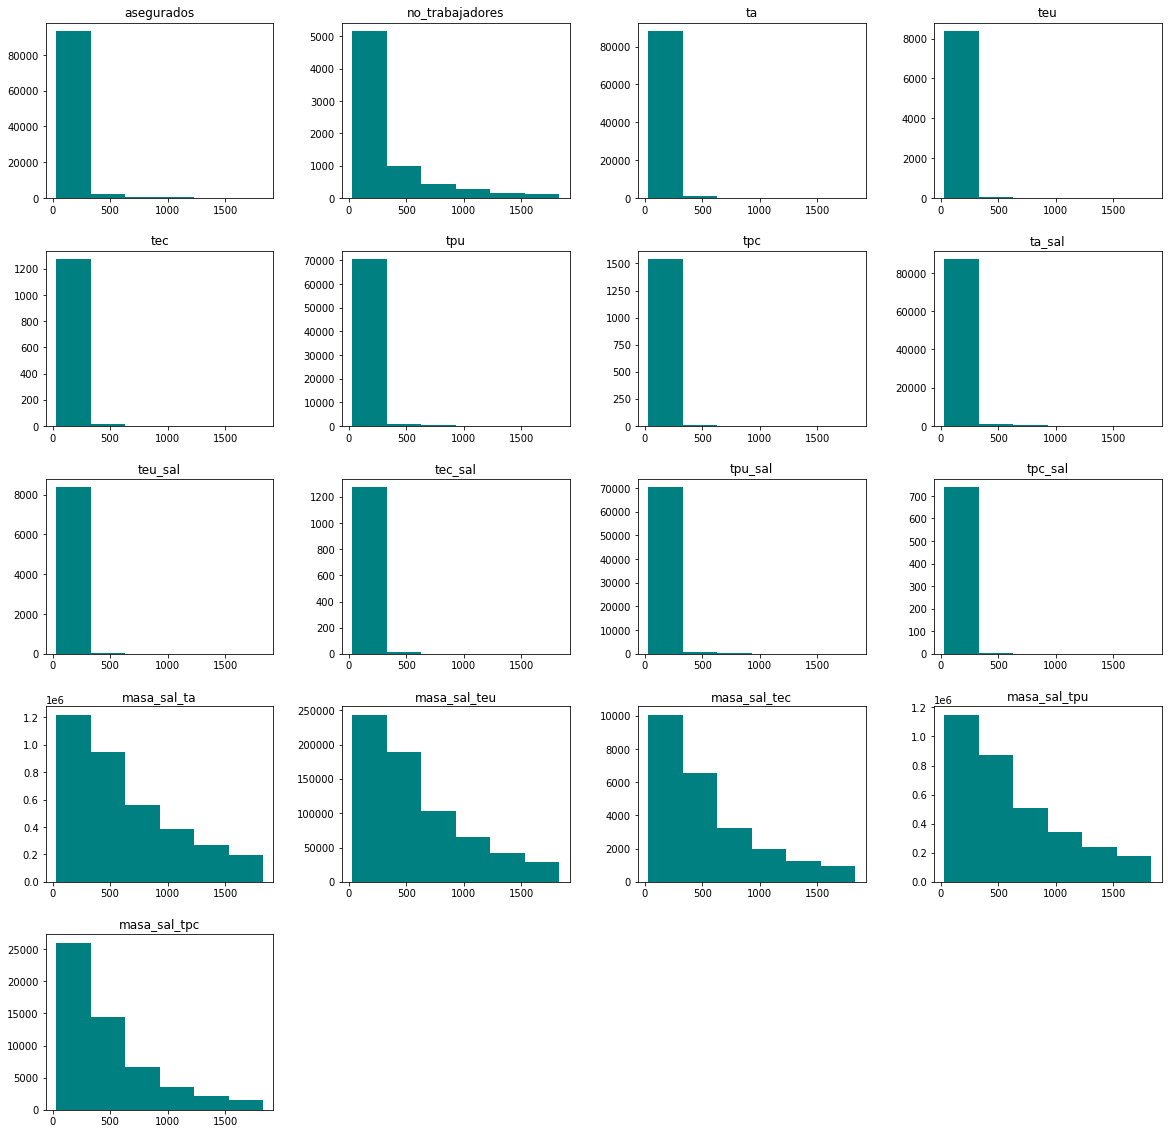

In [11]:
plt.rcParams['figure.figsize']=[20,20]
df[continuas].hist(color='teal',grid=False,bins=np.arange(30,2000,300))
plt.savefig('histcontinuasexam.pdf')

Vemos que el valor más repetido es el 1 

In [12]:
df[['rango_salarial', 'asegurados']].groupby('rango_salarial').agg(['min', 'mean', 'max', 'count', pd.Series.mode])

asegurados                              
                      min      mean   max    count mode
rango_salarial                                         
W1                      1  2.023241   192    12908    1
W10                     1  2.212838   309    92211    1
W11                     1  2.221504   220    72861    1
W12                     1  2.288256   320    61421    1
W13                     1  2.244314   155    51573    1
W14                     1  2.064990   100    43653    1
W15                     1  1.868936   110    39515    1
W16                     1  1.821787    93    33084    1
W17                     1  1.679565    77    30365    1
W18                     1  4.507728  1249    83726    1
W2                      1  5.719425  2150  1660141    1
W3                      1  4.393047  1619   801435    1
W4                      1  3.998259  1724   456592    1
W5                      1  3.680703  2722   337670    1
W6                      1  3.371360  1706   235052    1
W7                      1  3.119622  2512   177208    1
W8                      1  2.615931   766   142524    1
W9                      1  2.472414   573   111779    1

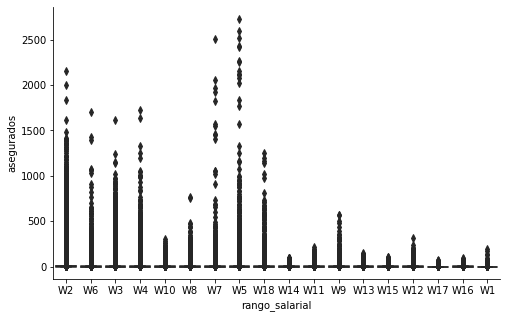

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x='rango_salarial',y='asegurados',data=df,palette=['teal','coral'])
sns.despine()


## Valores ausentes

<AxesSubplot:>

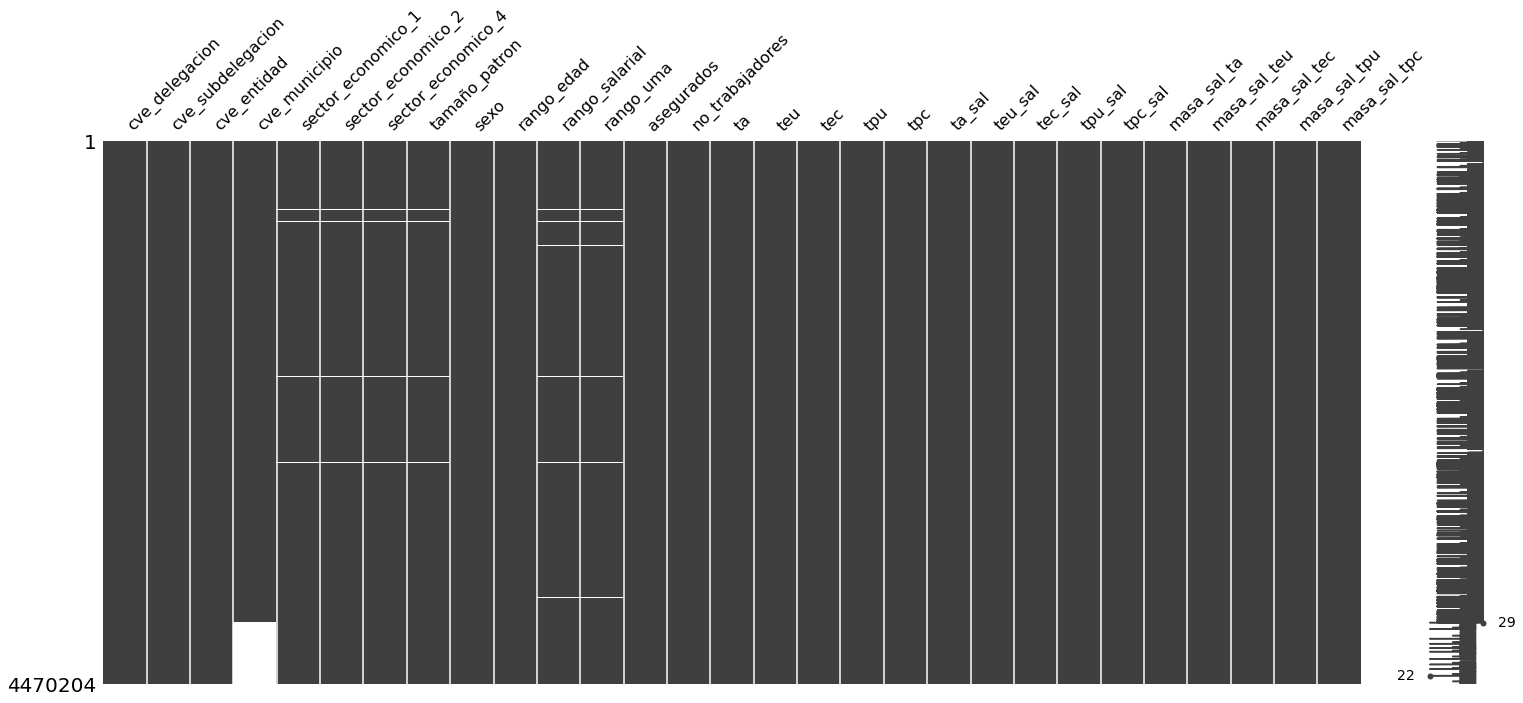

In [14]:
msno.matrix(df)

In [15]:
data = df.copy()

NA es No Aplica. El campo de “cve_municipio” toma el valor de NA cuando la entidad se refiere a Ciudad de México, ya que ciudad de México no tiene un municipio asociado, por lo que no lo eliminaremos

Los valores ausentes pertenecen al campo de 'No_trabajadores', por lo que no los eliminaremos, ya que el no tener esta información, da información

## Identificación de Outliers

**MÉTODO PERCENTILES**

In [16]:
def percentiles(data,l):
    for i in l:
        print(i)
        qn=data[i].quantile(.01)
        qm=data[i].quantile(.99)
        iqr=qm-qn
        data[f'per_{i}']=(data[i]<qn) | (data[i]>qm)

In [17]:
percentiles(data,continuas)

asegurados
no_trabajadores
ta
teu
tec
tpu
tpc
ta_sal
teu_sal
tec_sal
tpu_sal
tpc_sal
masa_sal_ta
masa_sal_teu
masa_sal_tec
masa_sal_tpu
masa_sal_tpc


In [18]:
data['dato_atipico']=data[[x for x in data.columns if 'per_' in x]].sum(axis=1)

In [19]:
data[['dato_atipico', 'no_trabajadores']].agg('sum')

dato_atipico        721514
no_trabajadores    7940591
dtype: int64

De acuerdo al resultado anterior, la mayor parte de datos atípicos provienen de los no_ trabajadores asegurados sin un empleo asociado, por lo que no se eliminaran outliers, con fines de tener un análisis descriptivo más completo.

## Ingenería de variables

In [20]:
data.head((1))

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,rango_salarial,rango_uma,asegurados,no_trabajadores,ta,teu,tec,tpu,tpc,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc,per_asegurados,per_no_trabajadores,per_ta,per_teu,per_tec,per_tpu,per_tpc,per_ta_sal,per_teu_sal,per_tec_sal,per_tpu_sal,per_tpc_sal,per_masa_sal_ta,per_masa_sal_teu,per_masa_sal_tec,per_masa_sal_tpu,per_masa_sal_tpc,dato_atipico
0,1,1,1,A01,NaN,NaN,NaN,NaN,1,E1,NaN,NaN,180,180,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,True,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,5


DICCIONARIO DE DATOS

Se cuenta con un diccionario de datos, en el que se explican los datos de las variables del conjunto, por lo que se hara el reemplazo para después crear nuevas variables:

 **UMA**

In [21]:
uma = pd.read_csv('DATA/uma.csv',encoding ='latin-1')

NOTA: se usara el tope de la UMA

In [22]:
N = 26
uma['cantidad_tope'] = range(1, N + 1 ,1)

In [23]:
uma.loc[uma['cantidad_tope'] ==26] = 0

Tomando de referencia el valor de la UMA en 2020 $ 86.88
El valor mensual de la UMA se calcula multiplicando su valor diario por 30.4 veces y su valor anual se calcula multiplicando su valor mensual por 12

In [24]:
uma['uma_valor']= (uma['cantidad_tope'])*86.88
uma['uma_mensual'] = uma['uma_valor']*30.4

In [25]:
uma.head()

,rango_salarial,descripción,cantidad_tope,uma_valor,uma_mensual
0,W1,Hasta 1 vez la UMA,1,86.88,2641.152
1,W2,mayor a 1 y hasta 2 veces la UMA,2,173.76,5282.304
2,W3,mayor a 2 y hasta 3 veces la UMA,3,260.64,7923.456
3,W4,mayor a 3 y hasta 4 veces la UMA,4,347.52,10564.608
4,W5,mayor a 4 y hasta 5 veces la UMA,5,434.40,13205.760


Teniendo los nuevos campos anteriores, se juntaran con el dataframe completo

In [26]:
df_1 = data.copy()

In [27]:
df_1 = df_1.drop(columns=['per_asegurados', 'per_no_trabajadores', 'per_ta', 'per_teu', 'per_tec',
       'per_tpu', 'per_tpc', 'per_ta_sal', 'per_teu_sal', 'per_tec_sal',
       'per_tpu_sal', 'per_tpc_sal', 'per_masa_sal_ta', 'per_masa_sal_teu',
       'per_masa_sal_tec', 'per_masa_sal_tpu', 'per_masa_sal_tpc'])

In [28]:
df_2 = df_1.merge(uma,on='rango_salarial', how='left')

**Salario**

In [29]:
salario = pd.read_csv('DATA/rango salarial.csv',encoding ='latin-1')

In [30]:
N = 26
salario['cantidad_tope'] = range(1, N + 1 ,1)

In [31]:
salario.loc[salario['cantidad_tope'] == 26] = 0

NOTA: De igual manera se usara el rango salarial topado, tomando en cuenta la cantidad de 185.56 mxn que es el salario minimo diario

In [32]:
salario['salario_diario'] = salario['cantidad_tope']*185.56

In [33]:
df_3 = df_2.merge(salario,on='rango_salarial',how='left')

**Delegacion**

In [34]:
delegacion = pd.read_csv('DATA/delegacion.csv',encoding ='latin-1')

In [35]:
delegacion.columns = ['cve_delegacion', 'delegacion', 'cve_subdelegacion', 'subdelegacion']

In [36]:
df_4 = df_3.merge(delegacion[['cve_delegacion', 'delegacion']], on ='cve_delegacion', how='left')

In [37]:
df_4['no_trabajadores'].sum()

34988327

**Sectores económicos**

In [38]:
sectores = pd.read_csv('DATA/sectores.csv',encoding ='latin-1')

## Identificación de escalas

In [39]:
for i in continuas:
    df_4[f'{i}_est']=\
    (df_4[i]-df_4[i].mean())/df_4[i].std()

In [40]:
var_est = ['asegurados_est', 'no_trabajadores_est', 'ta_est',
       'teu_est', 'tec_est', 'tpu_est', 'tpc_est', 'ta_sal_est', 'teu_sal_est',
       'tec_sal_est', 'tpu_sal_est', 'tpc_sal_est', 'masa_sal_ta_est',
       'masa_sal_teu_est', 'masa_sal_tec_est', 'masa_sal_tpu_est',
       'masa_sal_tpc_est']

## Visualización de datos

**ANÁLISIS POR CVE_DELEGACION**

Distribución de asegurados por estado de la República

In [41]:
asegurados = df_4[['delegacion','asegurados']]

In [42]:
asegurados = asegurados.groupby(['delegacion']).sum().reset_index()

In [43]:
asegurados['pct'] = asegurados['asegurados']/(asegurados['asegurados'].sum())

In [44]:
asegurados2 = df_4[['cve_delegacion','asegurados']]

In [45]:
asegurados2=asegurados2.groupby(['cve_delegacion']).sum().reset_index()

In [46]:
asegurados2['pct'] = asegurados2['asegurados']/(asegurados2['asegurados'].sum())

In [47]:
asegurados2['clas'] = 'otros'

In [48]:
asegurados2.loc[asegurados2.cve_delegacion == 40, 'clas'] = "Ciudad de México Sur"
asegurados2.loc[asegurados2.cve_delegacion == 39, 'clas'] = "Ciudad de México Norte"
asegurados2.loc[asegurados2.cve_delegacion == 14, 'clas'] = "Jalisco"
asegurados2.loc[asegurados2.cve_delegacion == 20, 'clas'] = "Nuevo León"
asegurados2.loc[asegurados2.cve_delegacion == 8, 'clas'] = "Chihuahua"

In [49]:
fig = px.pie(asegurados2, values='pct', names='clas', title='Porcentaje de Asegurados por clave de delegación',color_discrete_sequence= px.colors.sequential.Emrld)
fig.show()

In [50]:
fig = px.pie(asegurados, values='pct', names='delegacion', title='Porcentaje de Asegurados por clave de delegación',color_discrete_sequence= px.colors.sequential.Emrld)
fig.show()

In [51]:
no_trabajadores2 = df_4[['cve_delegacion','no_trabajadores']]

In [52]:
b2 = no_trabajadores2.groupby(['cve_delegacion']).sum().reset_index()

b2['pct']=b2['no_trabajadores']/b2['no_trabajadores'].sum()
b2['clas'] = 'otros'

In [53]:
b2 = b2.sort_values('pct',ascending=False)

In [54]:
b2.loc[b2.cve_delegacion == 39, 'clas'] = "Ciudad de México Norte"
b2.loc[b2.cve_delegacion == 40, 'clas'] = "Ciudad de México Sur"
b2.loc[b2.cve_delegacion == 14, 'clas'] = "Jalisco"
b2.loc[b2.cve_delegacion == 22, 'clas'] = "Puebla"
b2.loc[b2.cve_delegacion == 20, 'clas'] = "Oaxaca"

In [55]:
fig = px.pie(b2, values='pct', names='clas', title='Porcentaje de no trabajadores por clave de delegación',color_discrete_sequence= px.colors.sequential.Emrld)
fig.show()

In [56]:
no_trabajadores = df_4[['delegacion','no_trabajadores']]

In [57]:
no_trabajadores = no_trabajadores.groupby(['delegacion']).sum().reset_index()

no_trabajadores['pct'] = no_trabajadores['no_trabajadores']/(no_trabajadores['no_trabajadores'].sum())

In [58]:
fig = px.pie(no_trabajadores, values='pct', names='delegacion', title='Porcentaje de No Trabajadores por clave de delegación',color_discrete_sequence= px.colors.sequential.Peach)
fig.show()

In [59]:
a_t = asegurados.merge(no_trabajadores, on ='delegacion', how ='left')

In [60]:
a_t['avsnt']=a_t['no_trabajadores']/a_t['asegurados'] # ∞ de no trabajadores vs asegurados

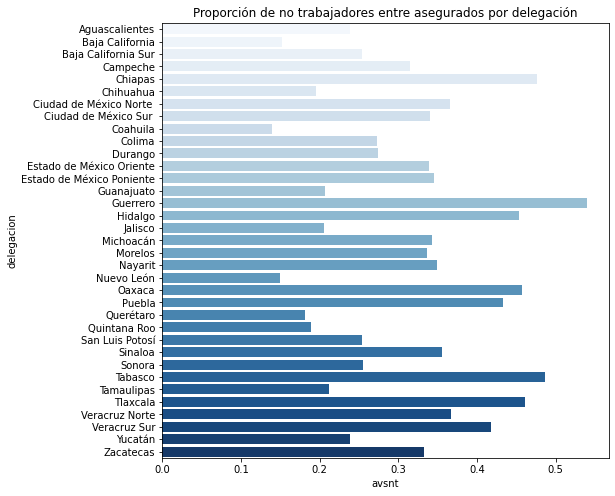

In [61]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="avsnt", y="delegacion", data=a_t,palette='Blues')
ax.set_title('Proporción de no trabajadores entre asegurados por delegación')
plt.savefig('proporcion.png')

In [62]:
salario_del = df_4[['delegacion', 'asegurados','salario_diario']]

In [63]:
salario_delegacion = salario_del.groupby(['delegacion']).agg(['min', 'mean', 'max', 'count','median', pd.Series.mode])

In [64]:
salario_delegacion  = salario_del.groupby(['delegacion']).median().reset_index()

In [65]:
salario_delegacion 

,delegacion,asegurados,salario_diario
0,Aguascalientes,1,556.68
1,Baja California,1,742.24
2,Baja California Sur,1,556.68
3,Campeche,1,556.68
4,Chiapas,1,371.12
5,Chihuahua,1,556.68
6,Ciudad de México Norte,2,742.24
7,Ciudad de México Sur,2,742.24
8,Coahuila,1,556.68
9,Colima,1,556.68


In [66]:
a_t['no_trabajadores'].sum()/a_t['asegurados'].sum()

0.2745324047840944

In [67]:
a_t['asegurados_trab'] = a_t['asegurados']-a_t['no_trabajadores']

In [68]:
a_t['pct_aseg'] = a_t['asegurados_trab']/a_t['asegurados']
a_t = a_t.sort_values('pct_aseg',ascending=False)

In [69]:
layout3 = go.Layout(
    title="Distribución de Trabajadores asegurados",
    xaxis_title="Clave de delegación",
    yaxis_title="Trabajadores asegurados",
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#FFFFFF",
)

In [70]:
fig = go.Figure(
    data=go.Bar(y=a_t['pct_aseg'], x=a_t['delegacion']),
    layout=layout3
)

fig.update_traces(marker_color='SteelBlue', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [71]:
a = df_4[['ta','asegurados','delegacion']].groupby(['delegacion']).mean().reset_index()

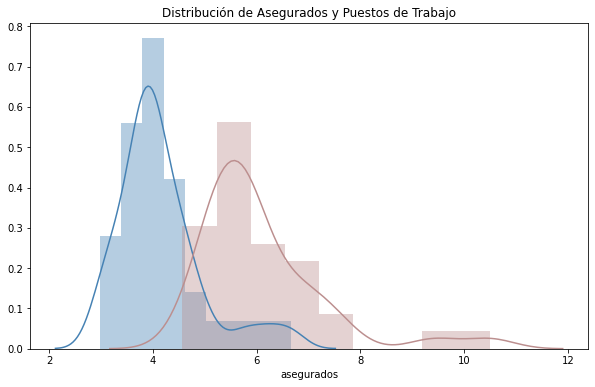

In [72]:
plt.figure(figsize=(10,6))
sns.distplot(a['ta'],color='SteelBlue')
sns.distplot(a['asegurados'],color='RosyBrown')
plt.title('Distribución de Asegurados y Puestos de Trabajo')
plt.savefig('aseg_trab.png')

In [73]:
b =df_4[['rango_salarial','asegurados']].groupby(['rango_salarial']).mean().reset_index()
b = b.sort_values(['asegurados'])

In [74]:
layout4 = go.Layout(
    title="Distribución de Rango Salarial",
    xaxis_title="Rango Salarial",
    yaxis_title="Asegurados",
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#FFFFFF",
)

In [75]:
fig = go.Figure(
    data=go.Bar(y=b['asegurados'], x=b['rango_salarial']),
    layout=layout4
)

fig.update_traces(marker_color='SteelBlue', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()

In [76]:
sectores.describe()

,sector_economico_1,sector_economico_2,sector_economico_4
count,276.000000,276.000000,276.000000
mean,4.478261,4.445652,4.858696
std,2.430765,2.864316,4.074528
min,0.000000,0.000000,0.000000
25%,3.000000,2.000000,2.000000
50%,3.000000,5.000000,4.000000
75%,6.000000,7.000000,7.000000
max,9.000000,9.000000,17.000000


In [77]:
df_5 = df_4.copy()

In [78]:
df_5.columns

Index(['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio',
       'sector_economico_1', 'sector_economico_2', 'sector_economico_4',
       'tamaño_patron', 'sexo', 'rango_edad', 'rango_salarial', 'rango_uma',
       'asegurados', 'no_trabajadores', 'ta', 'teu', 'tec', 'tpu', 'tpc',
       'ta_sal', 'teu_sal', 'tec_sal', 'tpu_sal', 'tpc_sal', 'masa_sal_ta',
       'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc',
       'dato_atipico', 'descripción_x', 'cantidad_tope_x', 'uma_valor',
       'uma_mensual', 'descripción_y', 'cantidad_tope_y', 'salario_diario',
       'delegacion', 'asegurados_est', 'no_trabajadores_est', 'ta_est',
       'teu_est', 'tec_est', 'tpu_est', 'tpc_est', 'ta_sal_est', 'teu_sal_est',
       'tec_sal_est', 'tpu_sal_est', 'tpc_sal_est', 'masa_sal_ta_est',
       'masa_sal_teu_est', 'masa_sal_tec_est', 'masa_sal_tpu_est',
       'masa_sal_tpc_est'],
      dtype='object')

In [79]:
df5 = df_5[['cve_delegacion','sector_economico_1', 'sector_economico_2', 'sector_economico_4','salario_diario','asegurados', 'no_trabajadores','delegacion']]

In [80]:
df_5

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,rango_salarial,rango_uma,asegurados,no_trabajadores,ta,teu,tec,tpu,tpc,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc,dato_atipico,descripción_x,cantidad_tope_x,uma_valor,uma_mensual,descripción_y,cantidad_tope_y,salario_diario,delegacion,asegurados_est,no_trabajadores_est,ta_est,teu_est,tec_est,tpu_est,tpc_est,ta_sal_est,teu_sal_est,tec_sal_est,tpu_sal_est,tpc_sal_est,masa_sal_ta_est,masa_sal_teu_est,masa_sal_tec_est,masa_sal_tpu_est,masa_sal_tpc_est
0,1,1,1,A01,NaN,NaN,NaN,NaN,1,E1,NaN,NaN,180,180,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aguascalientes,0.841541,0.865532,-0.267501,-0.129858,-0.025166,-0.251708,-0.03862,-0.266899,-0.129858,-0.025166,-0.251341,-0.043398,-0.202364,-0.134021,-0.027635,-0.187590,-0.05502
1,1,1,1,A01,NaN,NaN,NaN,NaN,1,E1,NaN,NaN,180,180,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aguascalientes,0.841541,0.865532,-0.267501,-0.129858,-0.025166,-0.251708,-0.03862,-0.266899,-0.129858,-0.025166,-0.251341,-0.043398,-0.202364,-0.134021,-0.027635,-0.187590,-0.05502
2,1,1,1,A01,NaN,NaN,NaN,NaN,1,E10,NaN,NaN,884,884,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aguascalientes,4.248130,4.282453,-0.267501,-0.129858,-0.025166,-0.251708,-0.03862,-0.266899,-0.129858,-0.025166,-0.251341,-0.043398,-0.202364,-0.134021,-0.027635,-0.187590,-0.05502
3,1,1,1,A01,NaN,NaN,NaN,NaN,1,E10,NaN,NaN,884,884,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aguascalientes,4.248130,4.282453,-0.267501,-0.129858,-0.025166,-0.251708,-0.03862,-0.266899,-0.129858,-0.025166,-0.251341,-0.043398,-0.202364,-0.134021,-0.027635,-0.187590,-0.05502
4,1,1,1,A01,NaN,NaN,NaN,NaN,1,E11,NaN,NaN,696,696,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,0.00,0.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aguascalientes,3.338416,3.369979,-0.267501,-0.129858,-0.025166,-0.251708,-0.03862,-0.266899,-0.129858,-0.025166,-0.251341,-0.043398,-0.202364,-0.134021,-0.027635,-0.187590,-0.05502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20932193,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,W18,W25,1,0,1,0,0,1,0,1,0,0,1,0,2168.77,0.0,0.0,2168.77,0.0,0,mayor a 17 y hasta 18 veces la UMA,18.0,1563.84,47540.736,mayor a 17 y hasta 18 veces el salario mínimo,18.0,3340.08,Ciudad de México Sur,-0.024623,-0.008113,-0.206940,-0.129858,-0.025166,-0.185083,-0.03862,-0.206141,-0.129858,-0.025166,-0.184701,-0.043398,0.041502,-0.134021,-0.027635,0.069855,-0.05502
20932194,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,W18,W25,1,0,1,0,0,1,0,1,0,0,1,0,2168.77,0.0,0.0,2168.77,0.0,0,mayor a 17 y hasta 18 veces la UMA,18.0,1563.84,47540.736,mayor a 17 y hasta 18 veces el salario mínimo,18.0,3340.08,Ciudad de México Sur,-0.024623,-0.008113,-0.206940,-0.129858,-0.025166,-0.185083,-0.03862,-0.206141,-0.129858,-0.025166,-0.184701,-0.043398,0.041502,-0.134021,-0.027635,0.069855,-0.05502
20932195,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,W18,W25,1,0,1,0,0,1,0,1,0,0,1,0,2168.77,0.0,0.0,2168.77,0.0,0,mayor a 17 y hasta 18 veces la UMA,18.0,1563.84,47540.736,mayor a 17 y hasta 18 veces el salario mínimo,18.0,3340.08,Ciudad de México Sur,-0.024623,-0.008113,-0.206940,-0.129858,-0.025166,-0.185083,-0.03862,-0.206141,-0.129858,-0.025166,-0.184701,-0.043398,0.041502,-0.134021,-0.027635,0.069855,-0.05502
20932196,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E9,W18,W25,1,0,1,0,0,1,0,1,0,0,1,0,2168.77,0.0,0.0,2168.77,0.0,0,mayor a 17 y hasta 18 veces la UMA,18.0,1563.84,47540.736,mayor a 17 y hasta 18 veces el salario mínimo,18.0,3340.08,Ciudad de México Sur,-0.024623,-0.008113,-0.206940,-0.129858,-0.025166,-0.185083,-0.03862,-0.206141,-0.129858,-0.025166,-0.184701,-0.043398,0.04150

In [81]:
e = df_5[['sector_economico_1', 'sector_economico_2', 'sector_economico_4','salario_diario','asegurados']]

In [82]:
c = e.groupby(['sector_economico_1']).mean().reset_index().replace({0: 'Agricultura, ganadería, silvicultura, pesca y casa', 1: 'Industrias extractivas',
          3: 'Industrias de transformación',
          4: 'Industrias de la construcción',
          5: 'Industria eléctrica y capacitación, suministro de agua potable',
          6: 'Comercio',
          7: 'Transportes y comunicaciones',
          8: 'Servicios para empresas, personas y el hogar',
          9: 'Servicios sociales y comunales'}).sort_values( by='asegurados',ascending=False)

In [83]:
layout5 = go.Layout(
    title="Asegurados por Sector Económico",
    xaxis_title="Rango Salarial",
    yaxis_title="Asegurados",
    autosize=False,
    width=5020,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#FFFFFF",
)

In [84]:
fig = go.Figure(
    data=go.Bar(y=c['asegurados'], x=c['sector_economico_1']),
    layout=layout4
)

fig.update_traces(marker_color='SteelBlue', marker_line_color='rgb(8,48,107)',
              
                  marker_line_width=2, opacity=0.6)
fig.show()

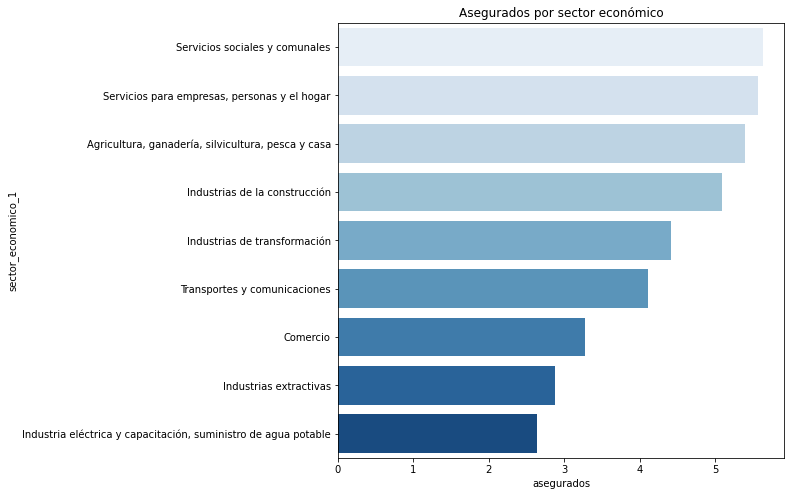

In [85]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x="asegurados", y="sector_economico_1", data=c,palette='Blues')
ax.set_title('Asegurados por sector económico')
plt.savefig('111.png')

Text(0.5, 1.0, 'Distribución de Asegurados y Puestos de Trabajo')

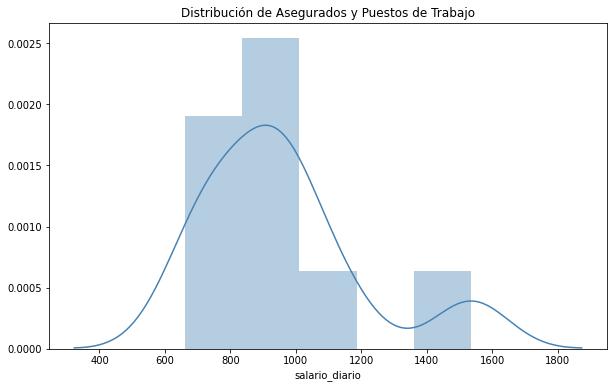

In [86]:
plt.figure(figsize=(10,6))
sns.distplot(c['salario_diario'],color='SteelBlue')
plt.title('Distribución de Asegurados y Puestos de Trabajo')

In [87]:
e['asegurados'].sum()

127446984

In [88]:
no_trabajadores['no_trabajadores'].sum()/e['asegurados'].sum()

0.2745324047840944

In [89]:
df['ta'].sum()

19495952

In [90]:
df_4.columns

Index(['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio',
       'sector_economico_1', 'sector_economico_2', 'sector_economico_4',
       'tamaño_patron', 'sexo', 'rango_edad', 'rango_salarial', 'rango_uma',
       'asegurados', 'no_trabajadores', 'ta', 'teu', 'tec', 'tpu', 'tpc',
       'ta_sal', 'teu_sal', 'tec_sal', 'tpu_sal', 'tpc_sal', 'masa_sal_ta',
       'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc',
       'dato_atipico', 'descripción_x', 'cantidad_tope_x', 'uma_valor',
       'uma_mensual', 'descripción_y', 'cantidad_tope_y', 'salario_diario',
       'delegacion', 'asegurados_est', 'no_trabajadores_est', 'ta_est',
       'teu_est', 'tec_est', 'tpu_est', 'tpc_est', 'ta_sal_est', 'teu_sal_est',
       'tec_sal_est', 'tpu_sal_est', 'tpc_sal_est', 'masa_sal_ta_est',
       'masa_sal_teu_est', 'masa_sal_tec_est', 'masa_sal_tpu_est',
       'masa_sal_tpc_est'],
      dtype='object')

In [91]:
dfinal =df_4[['delegacion','asegurados','no_trabajadores','masa_sal_ta', 'ta_sal']]

In [92]:
dfinal['sbcd'] = dfinal['masa_sal_ta'] / dfinal['ta_sal']

In [93]:
dfinal = dfinal.groupby('delegacion').median().reset_index()

In [94]:
dfinal = dfinal.sort_values('sbcd',ascending=False)

In [95]:
layout2 = go.Layout(
    title="Mediana Salario Base de cotización diario",
    xaxis_title="Clave de delegación",
    yaxis_title="Asegurados",
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="#FFFFFF",
)

In [96]:
fig = go.Figure(
    data=go.Bar(y=dfinal['sbcd'], x=dfinal['delegacion']),
    layout=layout2
)

fig.update_traces(marker_color='SteelBlue', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.show()